# Задание 2

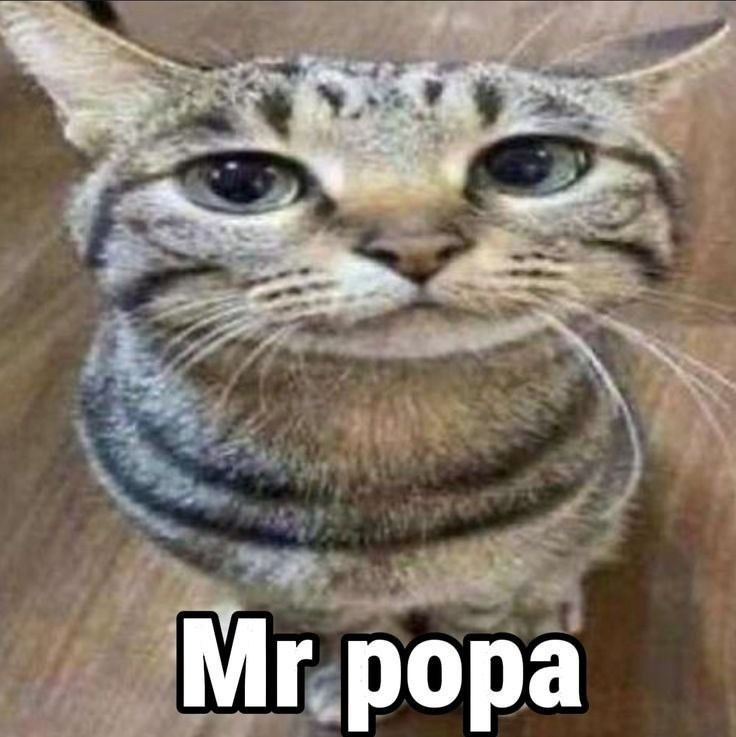

Многоклассовая классификация
1) Подготовить анализ и обработку датасета
2) Необходимо получить модель классификации (из упоминаемых в лекции), дающую одинаково высокое качество на разных классах датасета
3) Качество модели продемонстрировать с помощью посчитанных метрик
4) Выложить на github

# Часть 1
Прочитаем датасет и попробуем его поанализировать

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel('dataset.xlsx')
dataset

,oid,text,category
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,esport
1,749208109,Пусть это побудет здесь БорьбаВпрямомЭфире How...,esport
2,749208109,Раздача пиздюлей от Мунсунга. HowToFtokenoid Б...,esport
3,749208109,Не знаю как вам но мне стилистика нравится пус...,esport
4,749208109,Скриншоты из новой главы. Тэхунчика показали и...,esport
...,...,...,...
53193,910636962,8 битная буря снова накрыла пикселями автомоби...,autosport
53194,669736851,Ира Сидоркова объясняет как сказалась на ее ма...,autosport
53195,558919241,24 я ракетка мира хорват Марин Чилич обыграл и...,tennis
53196,776944963,Стал известен календарь мужской сборной России...,volleyball


Предположение: датасет содержит классы спорта, которые мы и будем анализировать. Колонка id нам не пригодится


Выведем информацию о датафрейме

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53198 entries, 0 to 53197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   oid       53198 non-null  int64 
 1   text      53198 non-null  object
 2   category  53198 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


Посмотрим что у нас по словам, переведем все слова в нижний регистр

In [4]:
import re

In [5]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower()).apply(lambda x: re.sub(r'[^а-яА-Я\s]', '', x))
dataset

,oid,text,category
0,749208109,спочно сообщество продается за р за покупкой п...,esport
1,749208109,пусть это побудет здесь борьбавпрямомэфире,esport
2,749208109,раздача пиздюлей от мунсунга борьбавпрямомэфире,esport
3,749208109,не знаю как вам но мне стилистика нравится пус...,esport
4,749208109,скриншоты из новой главы тэхунчика показали и ...,esport
...,...,...,...
53193,910636962,битная буря снова накрыла пикселями автомобил...,autosport
53194,669736851,ира сидоркова объясняет как сказалась на ее ма...,autosport
53195,558919241,я ракетка мира хорват марин чилич обыграл исп...,tennis
53196,776944963,стал известен календарь мужской сборной россии...,volleyball


Удалим ссылки

In [6]:
dataset = dataset.replace(to_replace=r'http://\S+|https://\S+', value='', regex=True)


перед тем, как анализировать анализ дальше, давайте избавыимся от всякой гадости при помощи регулярочек и различных модулей

Например от знаков препинания

In [7]:
import string


In [8]:
dataset['text'] = dataset['text'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation + '\n\xa0«»\t—…' ]))
dataset

,oid,text,category
0,749208109,спочно сообщество продается за р за покупкой п...,esport
1,749208109,пусть это побудет здесь борьбавпрямомэфире,esport
2,749208109,раздача пиздюлей от мунсунга борьбавпрямомэфире,esport
3,749208109,не знаю как вам но мне стилистика нравится пус...,esport
4,749208109,скриншоты из новой главы тэхунчика показали и ...,esport
...,...,...,...
53193,910636962,битная буря снова накрыла пикселями автомобил...,autosport
53194,669736851,ира сидоркова объясняет как сказалась на ее ма...,autosport
53195,558919241,я ракетка мира хорват марин чилич обыграл исп...,tennis
53196,776944963,стал известен календарь мужской сборной россии...,volleyball


А еще, меня очень сильно расстраивает колонка айдишников, давайте ее удалим

In [9]:
dataset.drop(columns=['oid'], inplace=True)
dataset

,text,category
0,спочно сообщество продается за р за покупкой п...,esport
1,пусть это побудет здесь борьбавпрямомэфире,esport
2,раздача пиздюлей от мунсунга борьбавпрямомэфире,esport
3,не знаю как вам но мне стилистика нравится пус...,esport
4,скриншоты из новой главы тэхунчика показали и ...,esport
...,...,...
53193,битная буря снова накрыла пикселями автомобил...,autosport
53194,ира сидоркова объясняет как сказалась на ее ма...,autosport
53195,я ракетка мира хорват марин чилич обыграл исп...,tennis
53196,стал известен календарь мужской сборной россии...,volleyball


И удалим дубликаты строк

In [10]:
dataset.drop_duplicates(inplace=True)

Давайте посмотрим, насколько сильно нам здесь нужны цифры

In [11]:
dataset['does_have_number?'] = dataset["text"].str.contains(r'\d')
dataset[dataset['does_have_number?']]

,text,category,does_have_number?


Как будто бы цифры тут ну вопще не нужны(метод пристального взгляда помогает всегда)

In [12]:
dataset

,text,category,does_have_number?
0,спочно сообщество продается за р за покупкой п...,esport,False
1,пусть это побудет здесь борьбавпрямомэфире,esport,False
2,раздача пиздюлей от мунсунга борьбавпрямомэфире,esport,False
3,не знаю как вам но мне стилистика нравится пус...,esport,False
4,скриншоты из новой главы тэхунчика показали и ...,esport,False
...,...,...,...
53193,битная буря снова накрыла пикселями автомобил...,autosport,False
53194,ира сидоркова объясняет как сказалась на ее ма...,autosport,False
53195,я ракетка мира хорват марин чилич обыграл исп...,tennis,False
53196,стал известен календарь мужской сборной россии...,volleyball,False


In [13]:
dataset.drop(columns=['does_have_number?'], inplace=True)
dataset['text'] = dataset['text'].apply(lambda x: ''.join([i for i in x if i not in string.digits ]))
dataset


,text,category
0,спочно сообщество продается за р за покупкой п...,esport
1,пусть это побудет здесь борьбавпрямомэфире,esport
2,раздача пиздюлей от мунсунга борьбавпрямомэфире,esport
3,не знаю как вам но мне стилистика нравится пус...,esport
4,скриншоты из новой главы тэхунчика показали и ...,esport
...,...,...
53193,битная буря снова накрыла пикселями автомобил...,autosport
53194,ира сидоркова объясняет как сказалась на ее ма...,autosport
53195,я ракетка мира хорват марин чилич обыграл исп...,tennis
53196,стал известен календарь мужской сборной россии...,volleyball


Теперь давайте токенизируем, удалим все стоп слова, слова длины 1(дабы избежать зашумление) и оставим слова только на русском


In [14]:
from nltk import word_tokenize

In [15]:
dataset['text'] = dataset['text'].apply(lambda x: word_tokenize(x))
dataset

,text,category
0,"[спочно, сообщество, продается, за, р, за, пок...",esport
1,"[пусть, это, побудет, здесь, борьбавпрямомэфире]",esport
2,"[раздача, пиздюлей, от, мунсунга, борьбавпрямо...",esport
3,"[не, знаю, как, вам, но, мне, стилистика, нрав...",esport
4,"[скриншоты, из, новой, главы, тэхунчика, показ...",esport
...,...,...
53193,"[битная, буря, снова, накрыла, пикселями, авто...",autosport
53194,"[ира, сидоркова, объясняет, как, сказалась, на...",autosport
53195,"[я, ракетка, мира, хорват, марин, чилич, обыгр...",tennis
53196,"[стал, известен, календарь, мужской, сборной, ...",volleyball


In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivzarru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('russian'))


In [19]:
dataset['text'] = dataset['text'].apply(lambda x:[word for word in x if word not in stop_words and len(word) >1 and not re.search('[a-zA-Z]', word)])


In [20]:
dataset.dropna(inplace=True)

Посмотрим, сколько у нас различных классов и поймкем, нужна ли балансировка

<Axes: xlabel='count', ylabel='category'>

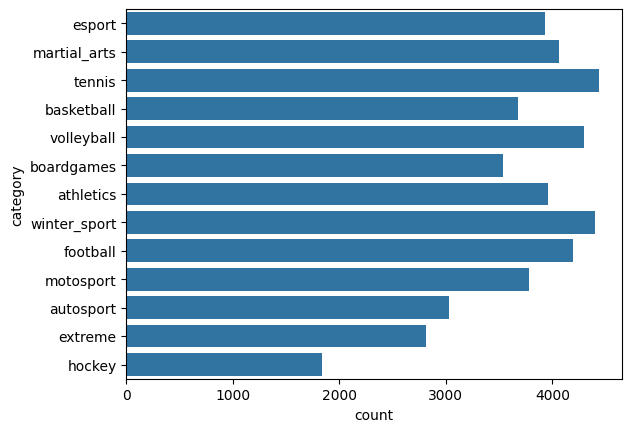

In [21]:
import seaborn as sns
sns.countplot(dataset['category'])

Теперь проведем частотный анализ, посмотрим на графики, циферки


In [22]:
from nltk.probability import FreqDist


In [23]:

corpus = nltk.Text(word_tokenize(' '.join(dataset['text'].apply(lambda x: ' '.join(x)).tolist())))
fdist = FreqDist(corpus)


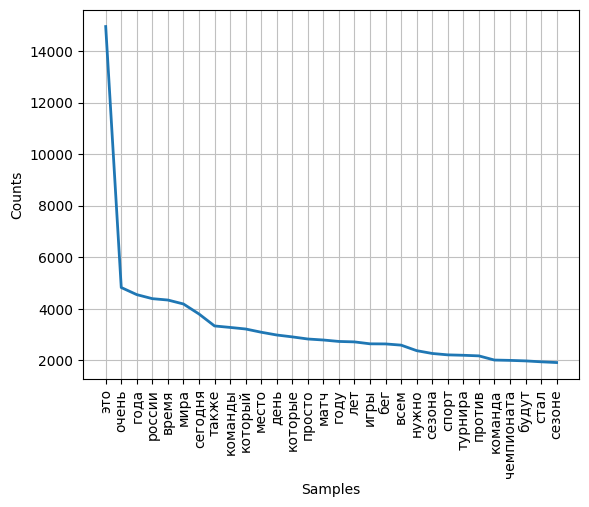

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
fdist.plot(30,cumulative=False)


"Это" бы тоже удалить, но в голову пришла идея очень жестко почистить от всякой гадости наш датасетик
Для этого выведем, пробежимся глазками и удалим все служебные части речи

In [25]:
fdist.most_common(100)


[('это', 14945),
 ('очень', 4826),
 ('года', 4550),
 ('россии', 4394),
 ('время', 4341),
 ('мира', 4188),
 ('сегодня', 3800),
 ('также', 3336),
 ('команды', 3279),
 ('который', 3218),
 ('место', 3093),
 ('день', 2985),
 ('которые', 2912),
 ('просто', 2830),
 ('матч', 2791),
 ('году', 2735),
 ('лет', 2718),
 ('игры', 2643),
 ('бег', 2639),
 ('всем', 2592),
 ('нужно', 2378),
 ('сезона', 2269),
 ('спорт', 2215),
 ('турнира', 2199),
 ('против', 2176),
 ('команда', 2014),
 ('чемпионата', 2001),
 ('будут', 1981),
 ('стал', 1946),
 ('сезоне', 1917),
 ('гран', 1898),
 ('друзья', 1842),
 ('свой', 1839),
 ('нам', 1811),
 ('видео', 1796),
 ('сказал', 1776),
 ('поэтому', 1772),
 ('пока', 1725),
 ('фото', 1697),
 ('сезон', 1691),
 ('первый', 1690),
 ('матча', 1674),
 ('матче', 1568),
 ('динамо', 1542),
 ('чемпион', 1532),
 ('второй', 1530),
 ('очков', 1515),
 ('год', 1501),
 ('км', 1465),
 ('игра', 1419),
 ('несколько', 1415),
 ('дня', 1412),
 ('сборной', 1412),
 ('бой', 1406),
 ('своей', 1394),
 (

Для этого используем PyMorphy(по пути еще по хорошему сделаем лемматизацию)

In [26]:
! pip install pymorphy2

In [27]:
import pymorphy2
import pymorphy2_dicts_ru

In [28]:
morph = pymorphy2.MorphAnalyzer(lang='ru')


In [29]:
def pos(word, morph=pymorphy2.MorphAnalyzer()):
    return morph.parse(word)[0].tag.POS

In [30]:
functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP'}

In [31]:
dataset['text'] = dataset['text'].apply(lambda x: [i for i in x if pos(i, morph) not in functors_pos])
dataset

,text,category
0,"[спочно, сообщество, продается, покупкой, пиши...",esport
1,"[побудет, борьбавпрямомэфире]",esport
2,"[раздача, пиздюлей, мунсунга, борьбавпрямомэфире]",esport
3,"[знаю, стилистика, нравится, странная, борьбав...",esport
4,"[скриншоты, новой, главы, тэхунчика, показали,...",esport
...,...,...
53193,"[битная, буря, снова, накрыла, пикселями, авто...",autosport
53194,"[ира, сидоркова, объясняет, сказалась, машине,...",autosport
53195,"[ракетка, мира, хорват, марин, чилич, обыграл,...",tennis
53196,"[стал, известен, календарь, мужской, сборной, ...",volleyball


Давайте также исправим все орфографические ошибки в словах при помощи PySpellChecker

In [32]:
#! pip install pyspellchecker

Функция, которая исправляет ошибки в тексте

In [33]:
#from spellchecker import SpellChecker
#biba = 0
#spell = SpellChecker(language='ru')

#def correction(text):
   # global biba
  #  biba += 1
 #   print(biba, text)
#    return [spell.correction(word) for word in text]



In [34]:
#dataset['text'] = dataset['text'].apply(lambda x: correction(x))

Это очень долго..... Сохраним этот код как потенциальную идею

А теперь почистим данные: Удалим все посты длины 0

In [35]:
dataset['lom'] = dataset['text'].apply(lambda x: len(x))
dataset =dataset[dataset['lom']!=0]
dataset

,text,category,lom
0,"[спочно, сообщество, продается, покупкой, пиши...",esport,7
1,"[побудет, борьбавпрямомэфире]",esport,2
2,"[раздача, пиздюлей, мунсунга, борьбавпрямомэфире]",esport,4
3,"[знаю, стилистика, нравится, странная, борьбав...",esport,5
4,"[скриншоты, новой, главы, тэхунчика, показали,...",esport,6
...,...,...,...
53193,"[битная, буря, снова, накрыла, пикселями, авто...",autosport,33
53194,"[ира, сидоркова, объясняет, сказалась, машине,...",autosport,66
53195,"[ракетка, мира, хорват, марин, чилич, обыграл,...",tennis,24
53196,"[стал, известен, календарь, мужской, сборной, ...",volleyball,73


Что у нас по графику частоты слов теперь?

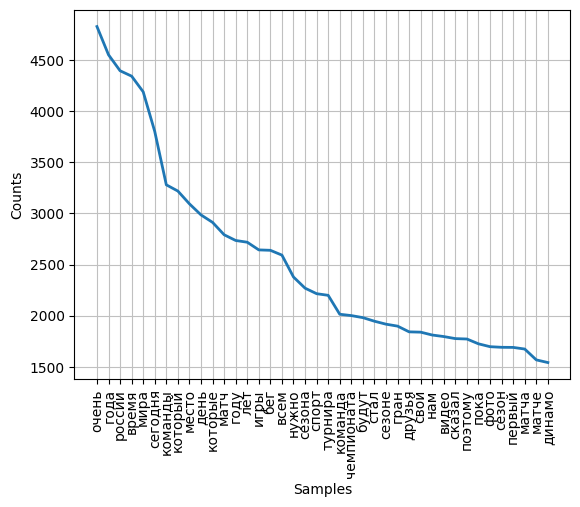

<Axes: xlabel='Samples', ylabel='Counts'>

In [36]:
corpus = nltk.Text(word_tokenize(' '.join(dataset['text'].apply(lambda x: ' '.join(x)).tolist())))
fdist = FreqDist(corpus)
fdist.plot(40,cumulative=False)


Выглядит вкуснее, давайте Лемматизируем и посмотрим, что там за демон
Используем модуль pymystem3

In [37]:
! pip install pymystem3

In [38]:
from pymystem3 import Mystem
mystem = Mystem() 
dataset['text'] = dataset['text'].apply(lambda x: mystem.lemmatize(' '.join(x)))
dataset['text'] = dataset['text'].apply(lambda x: ''.join(x).split())
dataset

,text,category,lom
0,"[спочный, сообщество, продаваться, покупка, пи...",esport,7
1,"[побыть, борьбавпрямомэфир]",esport,2
2,"[раздача, пиздюли, мунсунг, борьбавпрямомэфир]",esport,4
3,"[знать, стилистика, нравиться, странный, борьб...",esport,5
4,"[скриншот, новый, глава, тэхунчик, показывать,...",esport,6
...,...,...,...
53193,"[битный, буря, снова, накрывать, пиксел, автом...",autosport,33
53194,"[ира, сидорков, объяснять, сказываться, машина...",autosport,66
53195,"[ракетка, мир, хорват, марина, чилич, обыгрыва...",tennis,24
53196,"[становиться, известный, календарь, мужской, с...",volleyball,73


Увидили стремные запятые, повторим:

In [39]:
dataset['text'] = dataset['text'].apply(lambda x: [i for i in x if i not in string.punctuation + '\n\xa0«»\t—…' ])
dataset

,text,category,lom
0,"[спочный, сообщество, продаваться, покупка, пи...",esport,7
1,"[побыть, борьбавпрямомэфир]",esport,2
2,"[раздача, пиздюли, мунсунг, борьбавпрямомэфир]",esport,4
3,"[знать, стилистика, нравиться, странный, борьб...",esport,5
4,"[скриншот, новый, глава, тэхунчик, показывать,...",esport,6
...,...,...,...
53193,"[битный, буря, снова, накрывать, пиксел, автом...",autosport,33
53194,"[ира, сидорков, объяснять, сказываться, машина...",autosport,66
53195,"[ракетка, мир, хорват, марина, чилич, обыгрыва...",tennis,24
53196,"[становиться, известный, календарь, мужской, с...",volleyball,73


## Проблема дисбаланса клааааассса


Надоем вам с этим графиком... Уж очень он мне нравится

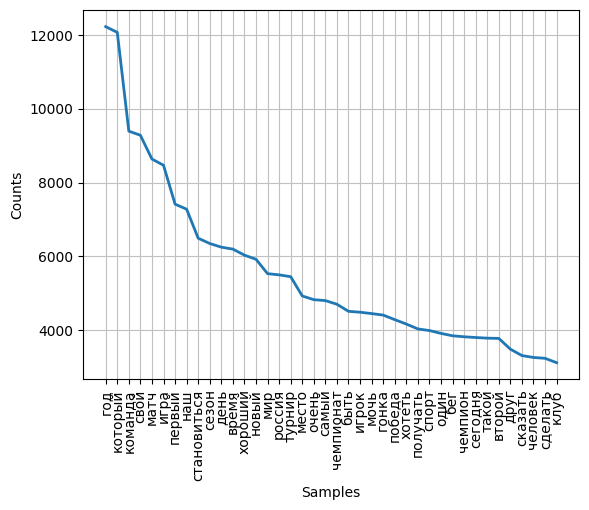

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
corpus = nltk.Text(word_tokenize(' '.join(dataset['text'].apply(lambda x: ' '.join(x)).tolist())))
fdist = FreqDist(corpus)
fdist.plot(40,cumulative=False)


<Axes: xlabel='count', ylabel='category'>

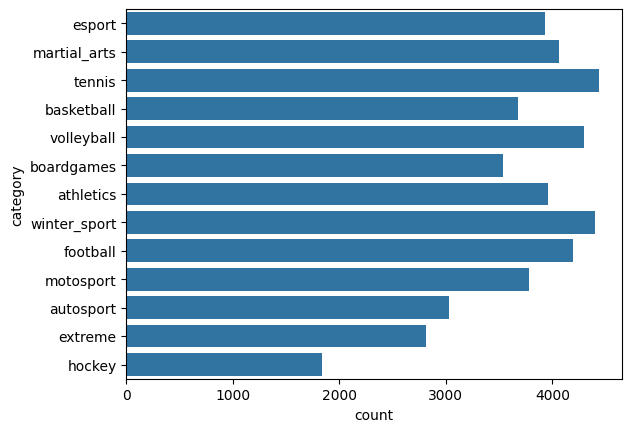

In [41]:
import seaborn as sns
sns.countplot(dataset['category'])

In [42]:
dataset.groupby('category').apply(print)

                                                    text   category  lom
75     [объяснять, свой, тело, финиш, превращаться, ж...  athletics    6
76     [никто, совершенный, рождение, мы, давать, цел...  athletics   17
77     [тяжелый, день, самый, хороший, тяжелый, день,...  athletics   13
78     [место, шаг, вперед, достигать, цель, выходить...  athletics    8
79     [ия, рааз, ия, дываа, иии, трррия, эксперимент...  athletics   13
...                                                  ...        ...  ...
53100  [драма, преодоление, степень, подвиг, бегунья,...  athletics  112
53113  [самый, сложный, метр, твой, жизнь, сентябрь, ...  athletics   92
53127  [присылать, ваш, беговой, фоточка, публикация,...  athletics   49
53134  [эротика, марафонский, бег, любитель, марафонс...  athletics   68
53185  [финал, спартакиада, июль, челябинск, заключит...  athletics  163

[3957 rows x 3 columns]
                                                    text   category  lom
13960  [привет, весовой, к

/tmp/ipykernel_46696/133224122.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset.groupby('category').apply(print)


""


Оставим по ~2500 единиц данных для каждого класса в датасете

In [43]:
grouped = dataset.groupby('category')

datasets = []

for name, group in grouped:
    #limited_group = group.head(2500)
    limited_group = group.head(500)
    datasets.append(limited_group)

dataset = pd.concat(datasets, ignore_index=True)
dataset

,text,category,lom
0,"[объяснять, свой, тело, финиш, превращаться, ж...",athletics,6
1,"[никто, совершенный, рождение, мы, давать, цел...",athletics,17
2,"[тяжелый, день, самый, хороший, тяжелый, день,...",athletics,13
3,"[место, шаг, вперед, достигать, цель, выходить...",athletics,8
4,"[ия, рааз, ия, дываа, иии, трррия, эксперимент...",athletics,13
...,...,...,...
6495,"[сегодня, февраль, валентина, семеренко, возвр...",winter_sport,117
6496,"[минчук, сообщать, план, обновлять, программа,...",winter_sport,84
6497,"[новый, выпуск, век, фигурка, помнить, наш, пе...",winter_sport,11
6498,"[проходить, тренировка, олимпийский, игра, вло...",winter_sport,7


In [44]:
#dataset = pd.get_dummies(dataset, columns=['category']).astype(int)


In [45]:
! pip install keras
! pip install tf-keras

Займемся эмбеддингами

In [46]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('DeepPavlov/rubert-base-cased-sentence')
dataset['text'] = dataset['text'].apply(lambda x: model.encode(x))
dataset.to_csv('biba.csv')

/home/ivzarru/glowbyte_internship/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
2024-07-28 03:08:46.254342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 03:08:46.321003: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 03:08:46.339409: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 03:08:46.429834: I tensorflow/core/platform/cp

Для этого используем sklearn

In [47]:
import sklearn

Подгрузим датасет(который мы сохраняли после )

Давайте закодируем все мааааксимально тупым способом при помощи Label Encoding:))))))))))

In [48]:
! pip install keras
! pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [49]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



Накостылим))))

In [50]:
label_encoder = LabelEncoder()
model = label_encoder.fit(['esport', 'martial_arts', 'tennis', 'basketball', 'volleyball', 'boardgames', 'athletics', 'winter_sport', 'football', 'motosport', 'autosport', 'extreme' ,'hockey'])
dataset['category'] =  to_categorical(model.transform(dataset['category']))


Приведем все к одной размерности

In [51]:
from keras.utils import pad_sequences 



In [52]:
dataset['text']

0       [[-0.46785155, -0.49546894, -0.14335583, 0.276...
1       [[-0.045890316, -0.9905345, -0.2294054, -0.694...
2       [[-0.48890328, -1.1525122, 0.15215795, -0.3102...
3       [[-0.45635572, -0.1679991, -0.08140117, -0.349...
4       [[-0.14294423, -0.1417317, 0.026956994, -0.620...
                              ...                        
6495    [[0.11248373, -0.23105948, 0.016133284, 0.0664...
6496    [[-0.3195046, -0.124756135, -0.53592086, -0.18...
6497    [[0.10746792, -0.3941029, 0.6312565, -1.079551...
6498    [[-0.4874078, 0.13103166, -0.2290173, -0.04577...
6499    [[-0.34661666, 0.3064183, 0.34394577, -0.28947...
Name: text, Length: 6500, dtype: object

In [53]:
! pip install numpy==1.26.4

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [54]:
import numpy as nppredictions
import numpy as np
from sklearn.decomposition import PCA


In [55]:
dataset

,text,category,lom
0,"[[-0.46785155, -0.49546894, -0.14335583, 0.276...",1.0,6
1,"[[-0.045890316, -0.9905345, -0.2294054, -0.694...",1.0,17
2,"[[-0.48890328, -1.1525122, 0.15215795, -0.3102...",1.0,13
3,"[[-0.45635572, -0.1679991, -0.08140117, -0.349...",1.0,8
4,"[[-0.14294423, -0.1417317, 0.026956994, -0.620...",1.0,13
...,...,...,...
6495,"[[0.11248373, -0.23105948, 0.016133284, 0.0664...",0.0,117
6496,"[[-0.3195046, -0.124756135, -0.53592086, -0.18...",0.0,84
6497,"[[0.10746792, -0.3941029, 0.6312565, -1.079551...",0.0,11
6498,"[[-0.4874078, 0.13103166, -0.2290173, -0.04577...",0.0,7


In [56]:
max_length = 128

def pad_or_truncate(embedding, max_length):
    embedding = np.array(embedding)
    if len(embedding) < max_length:
        padding = np.zeros((max_length - len(embedding), embedding.shape[1]))
        embedding = np.vstack((embedding, padding))
    elif len(embedding) > max_length:
        embedding = embedding[:max_length]
    return embedding

dataset['text'] = dataset['text'].apply(lambda x: pad_or_truncate(x, max_length))

dataset.head()

,text,category,lom
0,"[[-0.46785154938697815, -0.49546894431114197, ...",1.0,6
1,"[[-0.04589031636714935, -0.9905344843864441, -...",1.0,17
2,"[[-0.488903284072876, -1.1525121927261353, 0.1...",1.0,13
3,"[[-0.4563557207584381, -0.16799910366535187, -...",1.0,8
4,"[[-0.14294423162937164, -0.14173169434070587, ...",1.0,13


In [57]:
dataset['text'] = dataset['text'].apply(lambda x: x.flatten())


In [58]:
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras.optimizers import Adam



In [59]:
dataset

,text,category,lom
0,"[-0.46785154938697815, -0.49546894431114197, -...",1.0,6
1,"[-0.04589031636714935, -0.9905344843864441, -0...",1.0,17
2,"[-0.488903284072876, -1.1525121927261353, 0.15...",1.0,13
3,"[-0.4563557207584381, -0.16799910366535187, -0...",1.0,8
4,"[-0.14294423162937164, -0.14173169434070587, 0...",1.0,13
...,...,...,...
6495,"[0.11248373240232468, -0.2310594767332077, 0.0...",0.0,117
6496,"[-0.31950458884239197, -0.12475613504648209, -...",0.0,84
6497,"[0.10746791958808899, -0.39410290122032166, 0....",0.0,11
6498,"[-0.4874078035354614, 0.13103166222572327, -0....",0.0,7


Поделим датасет

In [60]:
dataset['text'] = dataset['text'].apply(lambda x: x[:128:])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['category', 'lom']), dataset['category'],stratify=dataset['category'], test_size=0.2, random_state=42,)


In [62]:
X_test

,text
4749,"[-0.80045086145401, -1.0985267162322998, 0.240..."
3641,"[-0.1656891107559204, -0.3651532828807831, -0...."
6096,"[-0.5315057635307312, -0.015516236424446106, -..."
2927,"[-0.6549584269523621, -0.9793629050254822, 0.0..."
1106,"[-0.48927587270736694, 0.012820586562156677, -..."
...,...
2581,"[-0.1772596836090088, -0.1816672682762146, -0...."
3722,"[-0.37871110439300537, -0.016712386161088943, ..."
1012,"[-0.5014876127243042, -0.8803151249885559, -0...."
3705,"[0.19422520697116852, 0.08913310617208481, 0.3..."


In [63]:

print('Build model…')
model = Sequential()
model.add(Embedding(10000, 100)) 
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(13, activation='softmax'))
# try using different optimizers and different optimizer configs model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Summary of the built model…')
print(model.summary())

Build model…
Summary of the built model…


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Скомпилируем модель

In [64]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Предполагается, что категории кодируются one-hot способом
              metrics=['accuracy'])

Обучим первую модельку

In [65]:
len(X_train['text'][9])

128

Охххеееее... Многовато размерностей
давайте порежем хотя бы до 128

In [66]:
import numpy as np
from sklearn.decomposition import PCA
pca2 = PCA(n_components=128)
pca2.fit(X_train['text'].tolist())


PCA(n_components=128)

KeyError: False

In [93]:

history = model.fit(np.array(X_train['text'].values), np.array(y_train.values, dtype=np.float32), batch_size=32, epochs=10,
verbose=2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

Ну и что же у нас там навертелось

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='weighted'))
print('Recall:', recall_score(y_test, predictions, average='weighted'))
print('F1 Score:', f1_score(y_test, predictions, average='weighted'))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))